# Group 4 - Avengers

## Modelingo on Restaurant Expenditure Analysis

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
import statsmodels.api as sm

import os

In [72]:
os.chdir("C:\\Users\\satya\\Documents\\SEM 3 - SPRING 24\\CAPSTONE\\2. Modelling")
df =pd.read_excel("New Updated Feature Engineeting Dataset.xlsx")

In [73]:
df.head()

,Unique ID,AGE_REF,Gender,FAM_SIZE,STATE CODE,STATE NAME,No of Income Earners,Family Income after Taxes,Expenditures this quarter,Amount Spent on Groceries this Quarter,Other Expenditures this Quarter,SINGLE,MARRIED,AGE 1-25,AGE 25-50,AGE 50+,restaurant_spending_prev_quarter,Region,Expenditures Level,SEX_CATEGORICAL
0,5011064,87,Female,3,37,Oklahoma,1,57240.20,10669.1001,2212.0,8457.1001,0,1,0,0,3,931.0,Southeast,Medium,2
1,5011134,73,Female,2,36,Ohio,0,55570.00,11434.2500,1690.0,9744.2500,0,2,0,0,2,0.0,Midwest,Medium,2
2,5011244,47,Female,2,39,Pennsylvania,2,145387.00,24199.7501,1300.0,22899.7501,0,2,0,2,0,1140.0,Northeast,High,2
3,5011314,82,Female,1,20,Maine,0,248819.03,8025.0000,910.0,7115.0000,0,1,0,0,1,780.0,Northeast,Medium,2
4,5011334,87,Male,2,8,Delaware,0,50481.00,9367.0000,1196.0,8171.0000,0,2,0,0,2,650.0,Southeast,Medium,1


## EDA and Data Cleaning

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4415 entries, 0 to 4414
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unique ID                               4415 non-null   int64  
 1   AGE_REF                                 4415 non-null   int64  
 2   Gender                                  4415 non-null   object 
 3   FAM_SIZE                                4415 non-null   int64  
 4   STATE CODE                              4415 non-null   int64  
 5   STATE NAME                              4415 non-null   object 
 6   No of Income Earners                    4415 non-null   int64  
 7   Family Income after Taxes               4415 non-null   float64
 8   Expenditures this quarter               4415 non-null   float64
 9   Amount Spent on Groceries this Quarter  4415 non-null   float64
 10  Other Expenditures this Quarter         4415 non-null   floa

In [74]:
df.describe()

,Unique ID,AGE_REF,FAM_SIZE,STATE CODE,No of Income Earners,Family Income after Taxes,Expenditures this quarter,Amount Spent on Groceries this Quarter,Other Expenditures this Quarter,SINGLE,MARRIED,AGE 1-25,AGE 25-50,AGE 50+,restaurant_spending_prev_quarter,SEX_CATEGORICAL
count,4.415000e+03,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000
mean,5.165224e+06,58.951529,2.334541,28.440091,1.257305,110511.245434,12296.600931,1349.836315,12513.302905,0.379388,1.496036,0.658664,0.761721,0.941336,594.670669,1.504643
std,9.347813e+04,16.827597,1.411879,16.362303,0.999966,82049.269328,10797.733317,1007.404164,10750.837402,0.485290,0.500041,1.087329,0.863514,0.853019,735.695729,0.500035
min,5.011064e+06,29.000000,1.000000,4.000000,0.000000,17627.800000,20.000000,166.666700,1352.666600,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,5.095528e+06,45.000000,1.000000,12.000000,0.000000,47651.500000,5020.500000,606.666700,4806.666650,0.000000,1.000000,0.000000,0.000000,0.000000,108.333300,1.000000
50%,5.207302e+06,60.000000,2.000000,28.000000,1.000000,83958.600000,9131.900100,1040.000000,8794.000000,0.000000,1.000000,0.000000,0.000000,1.000000,366.666700,2.000000
75%,5.255061e+06,73.000000,3.000000,42.000000,2.000000,147678.700000,15740.083300,1775.500000,16139.650150,1.000000,2.000000,1.000000,2.000000,2.000000,800.000000,2.000000
max,5.286191e+06,87.000000,9.000000,55.000000,6.000000,454894.700000,77549.000100,6240.000000,63835.666700,1.000000,2.000000,6.000000,4.000000,4.000000,5260.000000,2.000000


## Handling missing values if any

In [75]:
df.isnull().sum()   #finding missing values using isnull function

Unique ID                                 0
AGE_REF                                   0
Gender                                    0
FAM_SIZE                                  0
STATE CODE                                0
STATE NAME                                0
No of Income Earners                      0
Family Income after Taxes                 0
Expenditures this quarter                 0
Amount Spent on Groceries this Quarter    0
Other Expenditures this Quarter           0
SINGLE                                    0
MARRIED                                   0
AGE 1-25                                  0
AGE 25-50                                 0
AGE 50+                                   0
restaurant_spending_prev_quarter          0
Region                                    0
Expenditures Level                        0
SEX_CATEGORICAL                           0
dtype: int64

<Axes: >

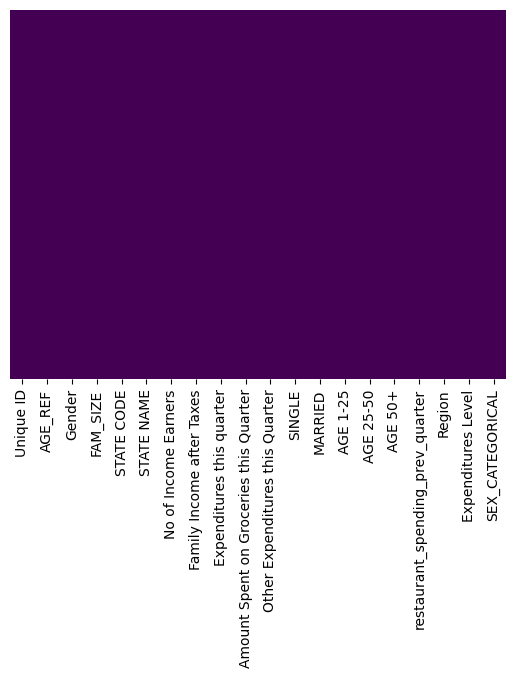

In [76]:
### Visual representation of missing values in heat map

sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [77]:
# Duplicates
duplicates = df.duplicated()                                  #finding duplicate values using duplicated function
print("total duplicates in the dataset",duplicates.sum())

total duplicates in the dataset 0


In [78]:
#outliers

# Function to find outliers using IQR method
def find_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers.tolist()

# Find outliers for numerical columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
outliers = {}
for column in numerical_columns:
    column_outliers = find_outliers(column)
    if column_outliers:
        outliers[column] = column_outliers

# Print outliers found in numerical columns
#for column, values in outliers.items():
#    print(f"Outliers in column '{column}': {values}")

In [79]:
# correlation matrix

corr_matrix = df.corr()                       # creating correlation matrix using function corr()
corr_matrix

,Unique ID,AGE_REF,FAM_SIZE,STATE CODE,No of Income Earners,Family Income after Taxes,Expenditures this quarter,Amount Spent on Groceries this Quarter,Other Expenditures this Quarter,SINGLE,MARRIED,AGE 1-25,AGE 25-50,AGE 50+,restaurant_spending_prev_quarter,SEX_CATEGORICAL
Unique ID,1.000000,-0.017833,-0.003527,0.011511,0.008215,-0.001257,-0.038002,-0.039997,-0.002896,0.015576,-0.011499,0.006869,-0.002828,-0.008133,-0.035751,0.018842
AGE_REF,-0.017833,1.000000,-0.363606,-0.004556,-0.386794,-0.111508,-0.158979,-0.117261,-0.073292,0.000754,-0.166629,-0.329407,-0.588578,0.401871,-0.164063,0.042163
FAM_SIZE,-0.003527,-0.363606,1.000000,0.003452,0.606879,0.178202,0.241794,0.311864,0.102757,-0.356559,0.486592,0.834552,0.599826,-0.010036,0.196026,-0.014555
STATE CODE,0.011511,-0.004556,0.003452,1.000000,-0.012419,-0.031276,-0.041823,-0.043055,-0.043269,-0.011788,0.014155,0.024044,-0.006591,-0.020095,-0.060167,-0.014635
No of Income Earners,0.008215,-0.386794,0.606879,-0.012419,1.000000,0.249934,0.302462,0.216969,0.151610,-0.177865,0.345929,0.428345,0.557452,-0.086149,0.254206,-0.050870
Family Income after Taxes,-0.001257,-0.111508,0.178202,-0.031276,0.249934,1.000000,0.330189,0.151478,0.332136,-0.152943,0.206472,0.097425,0.149743,0.028390,0.260663,-0.068996
Expenditures this quarter,-0.038002,-0.158979,0.241794,-0.041823,0.302462,0.330189,1.000000,0.432256,0.759968,-0.206020,0.283803,0.136655,0.178144,0.053427,0.550620,-0.053691
Amount Spent on Groceries this Quarter,-0.039997,-0.117261,0.311864,-0.043055,0.216969,0.151478,0.432256,1.000000,0.403404,-0.152459,0.194701,0.246025,0.170509,0.033862,0.311304,-0.017444
Other Expenditures this Quarter,-0.002896,-0.073292,0.102757,-0.043269,0.151610,0.332136,0.759968,0.403404,1.000000,-0.123386,0.145762,0.050606,0.076240,0.030252,0.408022,-0.041230
SINGLE,0.015576,0.000754,-0.356559,-0.011788,-0.177865,-0.152943,-0.206020,-0.152459,-0.123386,1.000000,-0.775692,-0.135356,-0.132390,-0.296482,-0.117902,0.057625


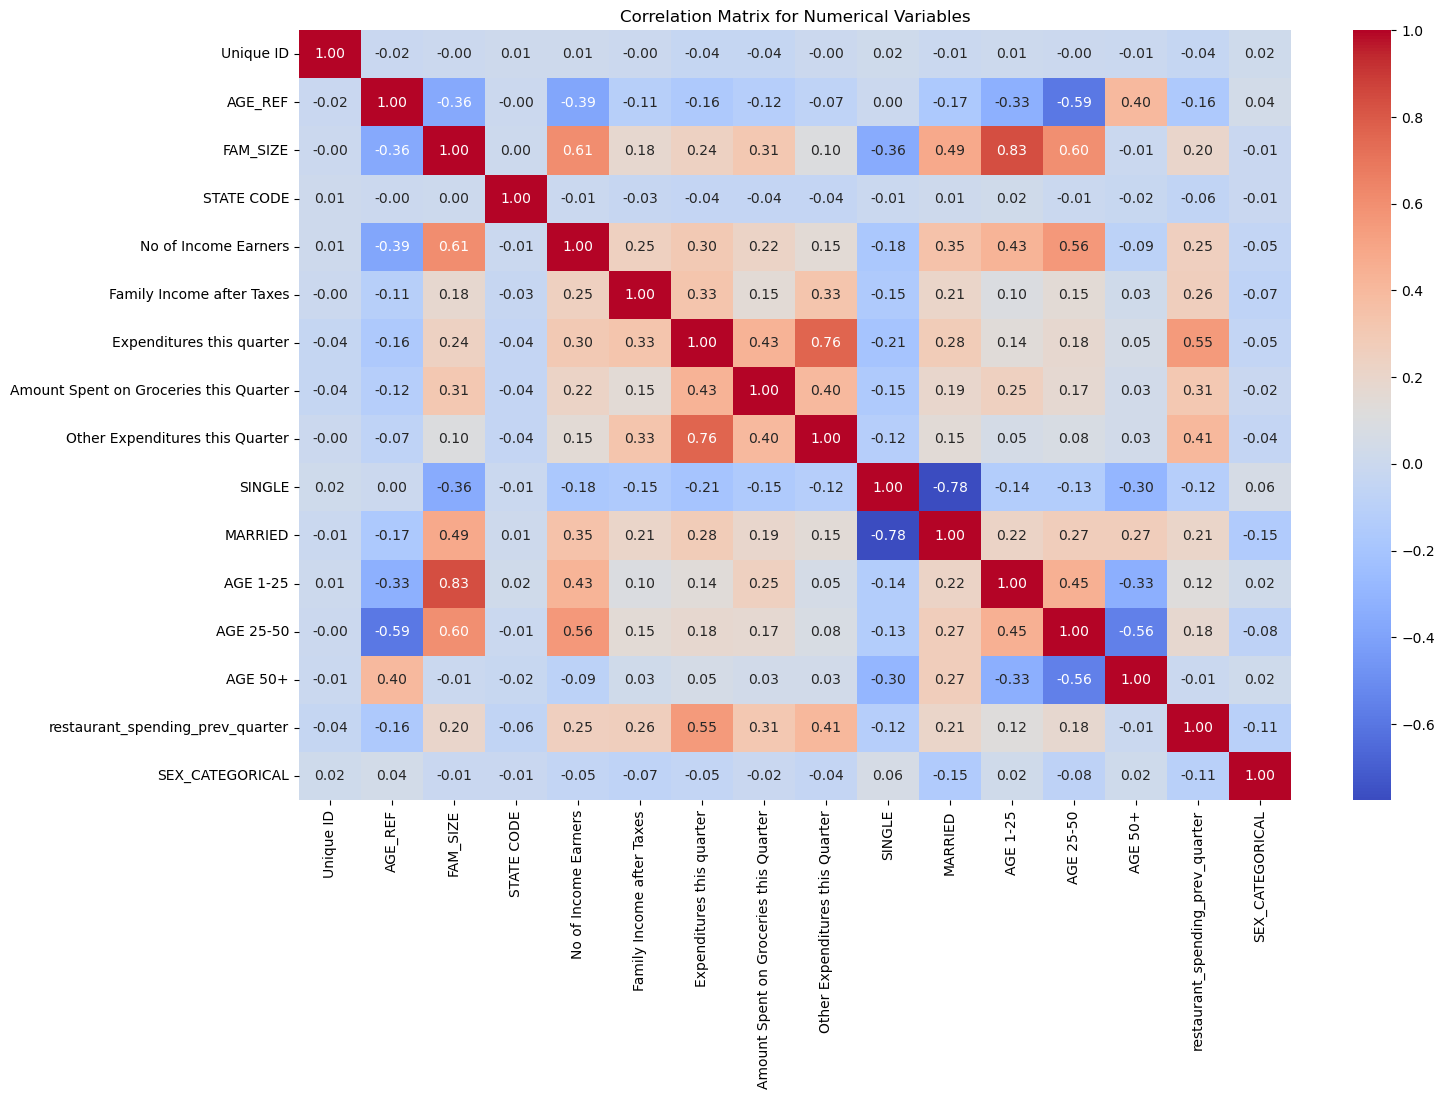

In [80]:
# Selecting numeric variables
numeric_df = df.select_dtypes(include=['int64', 'float64'])

#orrelation matrix 
numeric_correlation_matrix = numeric_df.corr()

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(16, 10))
sns.heatmap(numeric_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

# Histograms

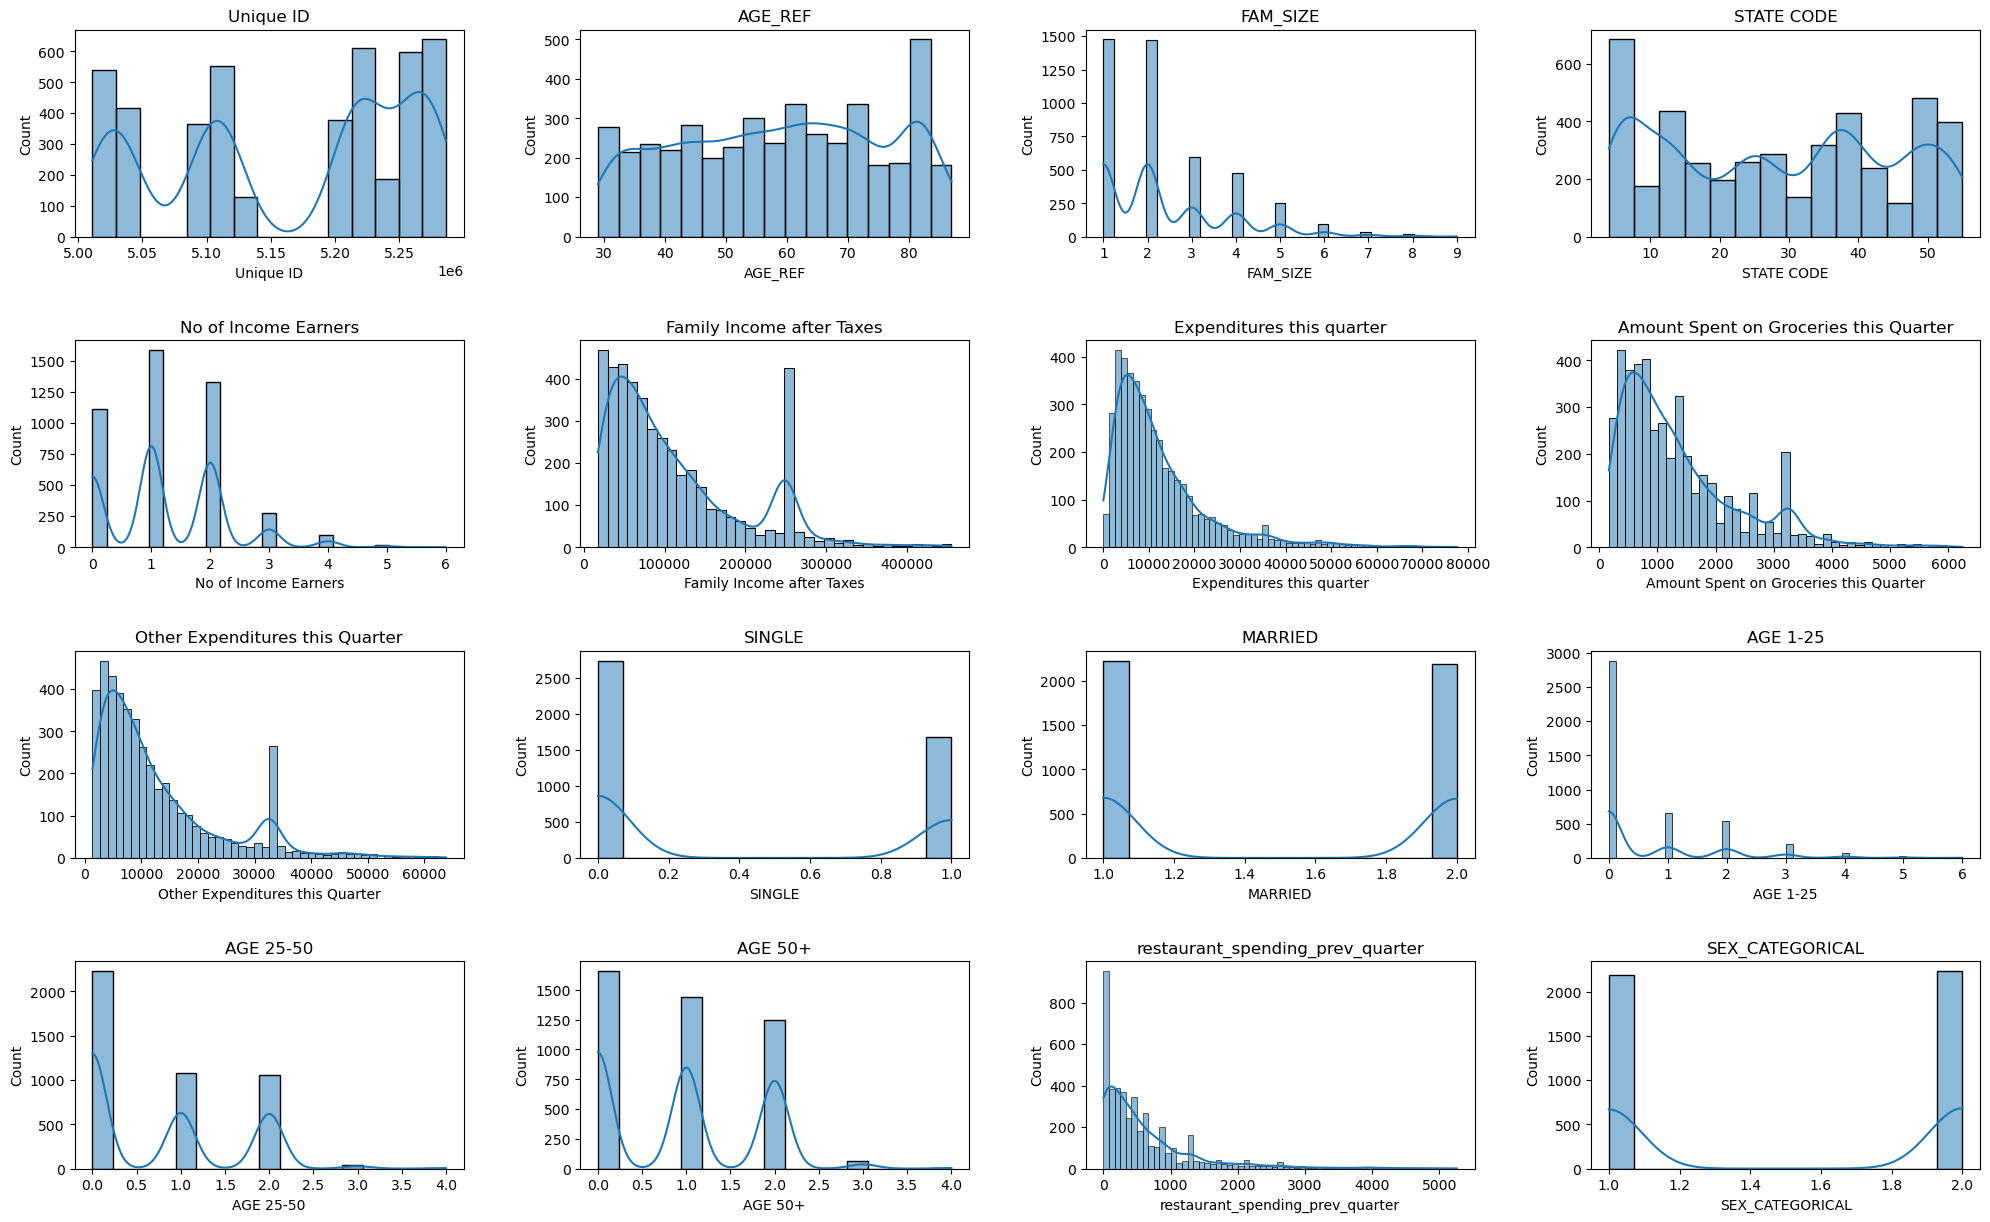

In [81]:


#plotting histograms for numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

#loop for plotting all the numerical histogram in the dataframe
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.tight_layout()

# Adjusting layout to prevent overlap
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()


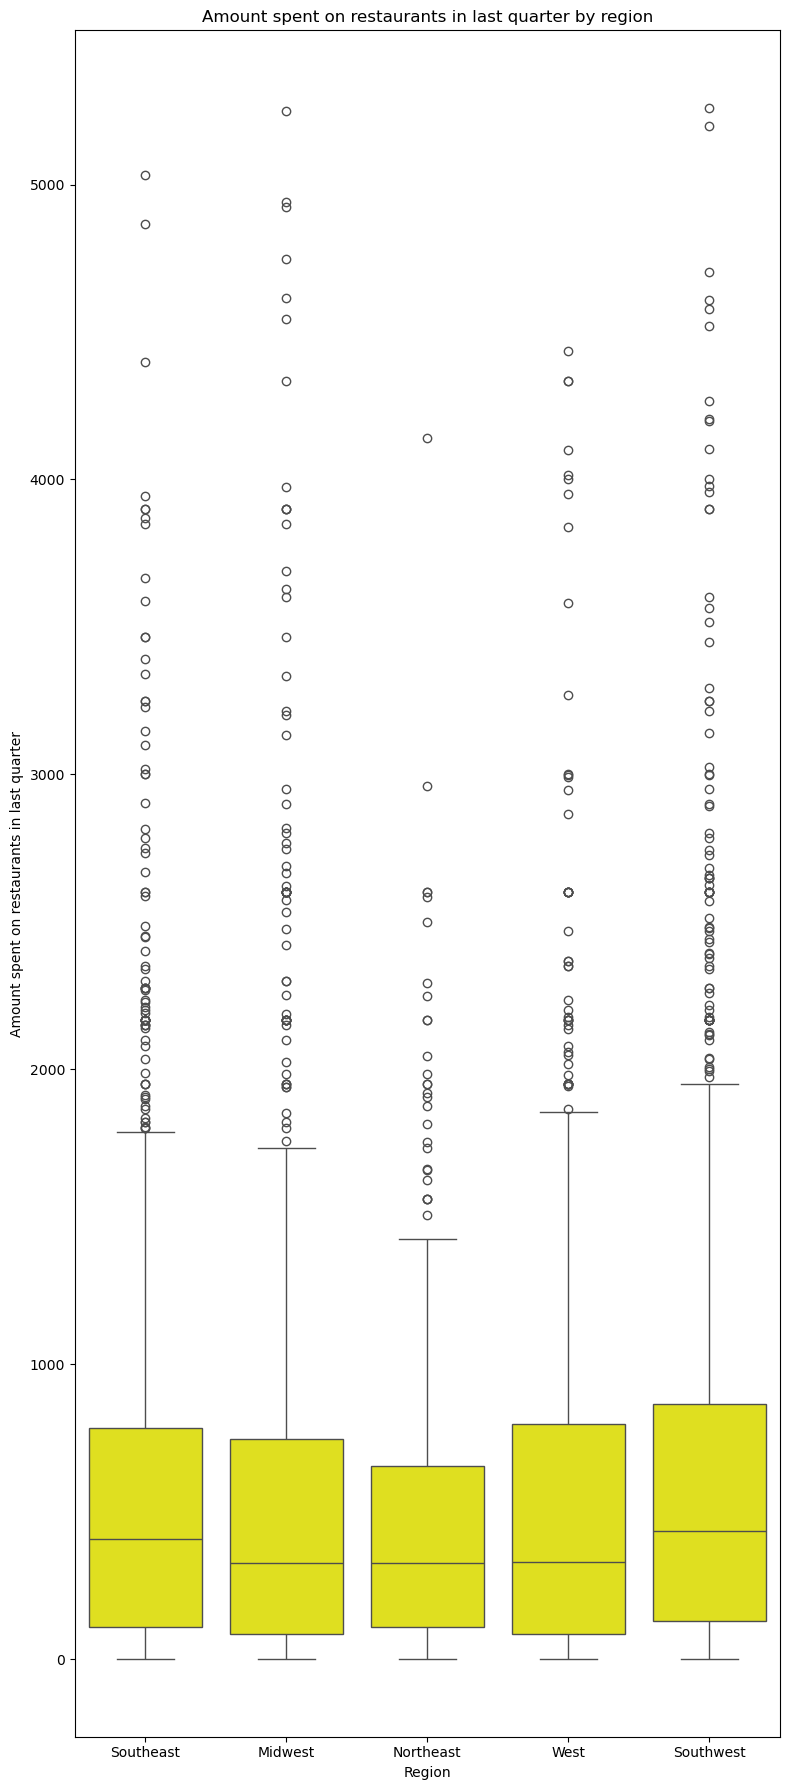

In [83]:
# box plot - 
key_categorical_features = ['Region'] 

plt.figure(figsize=(8, 18)) 

for i, feature in enumerate(key_categorical_features, 1):
    plt.subplot(len(key_categorical_features), 1, i)  # Changing the subplot layout
    sns.boxplot(x=df[feature], y=df['restaurant_spending_prev_quarter'], color='yellow')
    plt.title(f'Amount spent on restaurants in last quarter by region')
    plt.xlabel(feature)
    plt.ylabel('Amount spent on restaurants in last quarter')

plt.tight_layout()
plt.show()


## Updated feature Engineering

## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Selecting numerical features for scaling
features_to_scale = df.select_dtypes(include=[int, float]).columns.tolist()
features_to_scale.remove('restaurant_spending_prev_quarter')  # Excluding the dependent variable


# Standardizing the dataset (mean=0, std=1)
scaler_standard = StandardScaler()
df_scaled_standard = df.copy()
df_scaled_standard[features_to_scale] = scaler_standard.fit_transform(df[features_to_scale])

# Normalizing the dataset (range [0, 1])
scaler_minmax = MinMaxScaler()
df_scaled_minmax = df.copy()
df_scaled_minmax[features_to_scale] = scaler_minmax.fit_transform(df[features_to_scale])

## Calculating VIF

In [5]:

column_names = [
    'AGE_REF', 'FAM_SIZE', 'No of Income Earners', 'Family Income after Taxes',
    'Amount Spent on Groceries this Quarter','Other Expenditures this Quarter', 
    'restaurant_spending_prev_quarter'
]


missing_columns = [col for col in column_names if col not in df.columns]
existing_columns = [col for col in column_names if col in df.columns]

# Attempt VIF calculation with columns that correctly exist
df_numeric_final = df[existing_columns].select_dtypes(include=[int, float])

# Recalculate VIF
vif_data_final = pd.DataFrame()
vif_data_final["Feature"] = df_numeric_final.columns
vif_data_final["VIF"] = [variance_inflation_factor(df_numeric_final.values, i) for i in range(df_numeric_final.shape[1])]

missing_columns, vif_data_final.sort_values(by="VIF", ascending=False)

vif_data_final

,Feature,VIF
0,AGE_REF,3.400100
1,FAM_SIZE,5.802011
2,No of Income Earners,4.317428
3,Family Income after Taxes,3.283556
4,Amount Spent on Groceries this Quarter,3.710108
5,Other Expenditures this Quarter,3.358687
6,restaurant_spending_prev_quarter,2.153312


## Preparing the data for modeling

In [6]:
# creating dummy variables

X = pd.get_dummies(df.drop(['restaurant_spending_prev_quarter', 'STATE NAME'], axis=1))
y = df['restaurant_spending_prev_quarter']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 1. Random Forest Regressor Model

In [7]:
# Initializing the Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_split=20, random_state=42)

# Fitting the model to the training data
random_forest_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = random_forest_model.predict(X_test)


# Calculating evaluation metrics
Randomforest_mae = mean_absolute_error(y_test, y_pred)
Randomforest_mse = mean_squared_error(y_test, y_pred)
Randomforest_rmse = np.sqrt(Randomforest_mse)
Randomforest_r2 = r2_score(y_test, y_pred)

print("R-squared for Random Forest Regressor Model:",round(Randomforest_r2,3))

print("Mean Square Error for Random Forest Regressor Model:",round(Randomforest_mse,3))

print("Mean Absolute Error for Random Forest Regressor:",round(Randomforest_mae,3))

print("Root Mean Square Error for Random Forest Regressor:",round(Randomforest_rmse,3))

R-squared for Random Forest Regressor Model: 0.383
Mean Square Error for Random Forest Regressor Model: 326122.648
Mean Absolute Error for Random Forest Regressor: 382.74
Root Mean Square Error for Random Forest Regressor: 571.071


## HyperParameter Tuning - Random Forest

In [8]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=92)

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best Score: 0.33105011586257255


## 2. Multiple Linear Regression Model

In [9]:
# Initializing the Linear Regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)

# Calculate evaluation metrics
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)



print("R-squared for Multiple Linear Regression Model:",round(r2_linear,3))
print("Mean Square Error for Multiple Linear Regression Model:",round(mse_linear,3))
print("Mean Absolute Error for Multiple Linear Regression Model:",round(mae_linear,3))
print("Root Mean Square Error for Multiple Linear Regression Model:",round(rmse_linear,3))

R-squared for Multiple Linear Regression Model: 0.343
Mean Square Error for Multiple Linear Regression Model: 347231.207
Mean Absolute Error for Multiple Linear Regression Model: 384.025
Root Mean Square Error for Multiple Linear Regression Model: 589.263


## Comparison of Evaluation Metrics of both models

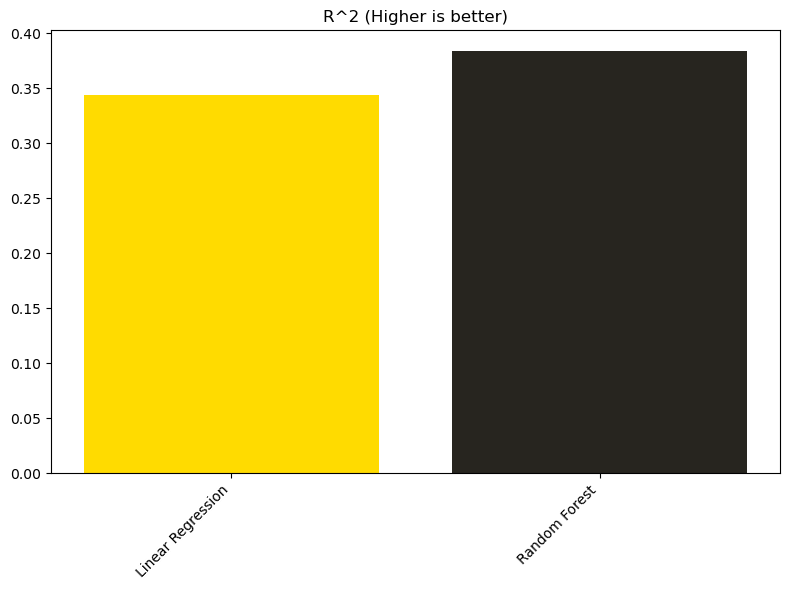

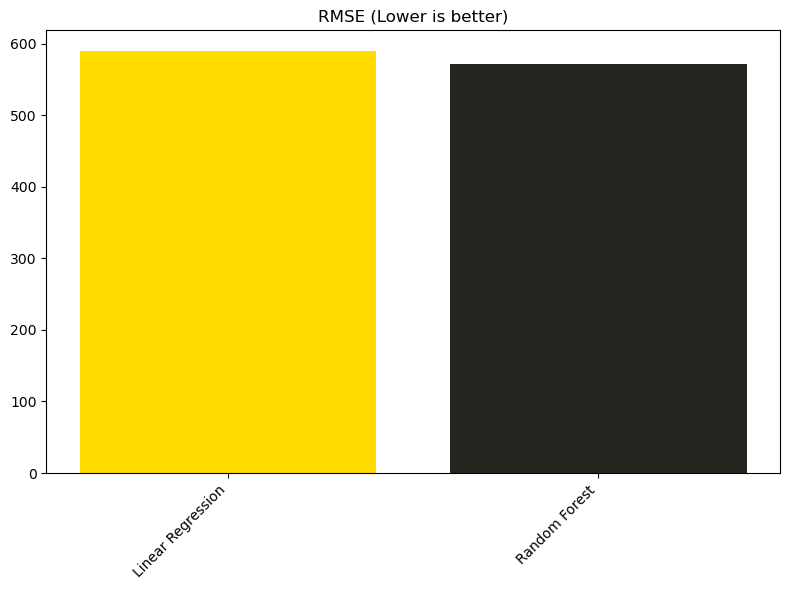

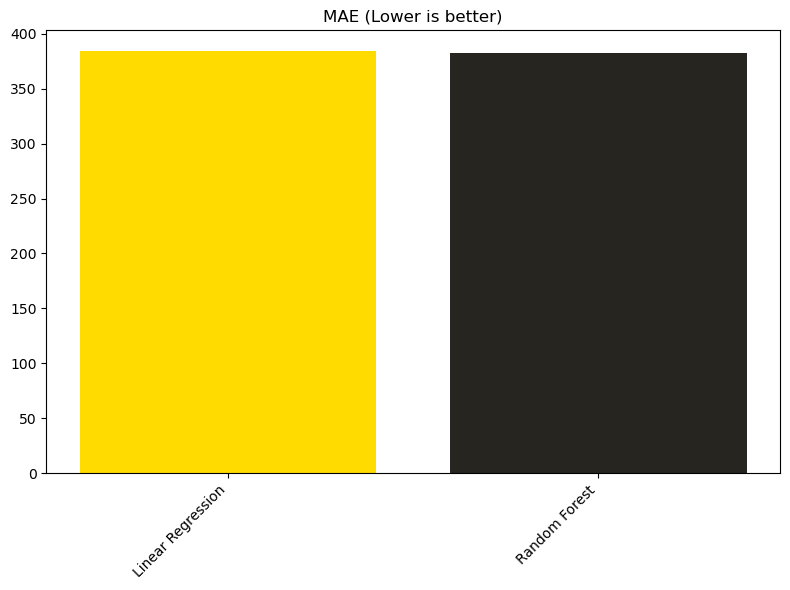

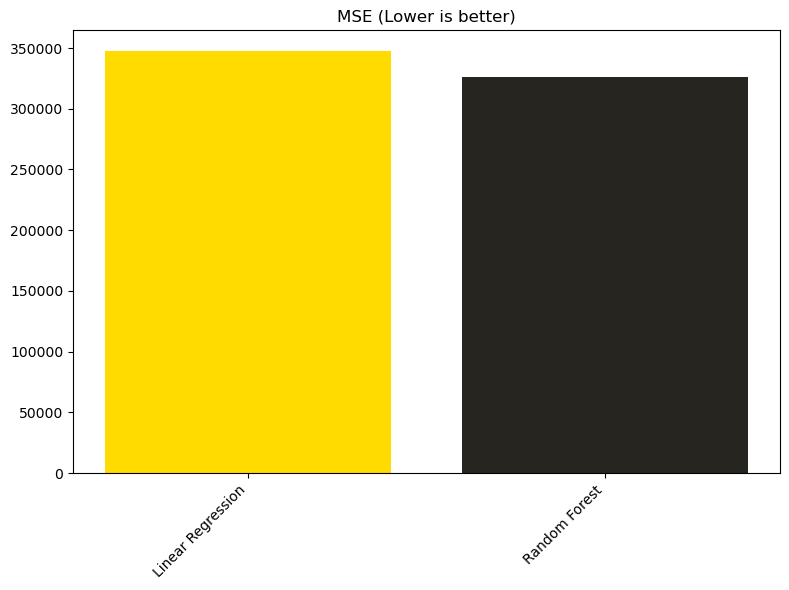

In [10]:
r2_values = {'Linear Regression': r2_linear,  'Random Forest': Randomforest_r2}
mae_values = {'Linear Regression':mae_linear ,  'Random Forest': Randomforest_mae}
rmse_values = {'Linear Regression': rmse_linear,  'Random Forest': Randomforest_rmse}
mse_values = {'Linear Regression': mse_linear,   'Random Forest': Randomforest_mse}


# Titles for the subplots
titles = ['R^2 (Higher is better)', 'RMSE (Lower is better)', 'MAE (Lower is better)', 'MSE (Lower is better)']

# Data for each subplot
metrics = [r2_values,  rmse_values, mae_values, mse_values]

# Colors for each model
colors = ['#FFDB00', '#27251F']  # for two models


def plot_individual_graphs(metric_values, title, colors):
    names = list(metric_values.keys())
    values = list(metric_values.values())
    plt.figure(figsize=(8, 6))
    bars = plt.bar(names, values, color=colors)  
    plt.title(title)
    plt.xticks(range(len(names)), names, rotation=45, ha="right")  
    plt.tight_layout()
    plt.show()

# Plot each graph individually with corrected colors application
plot_individual_graphs(r2_values, 'R^2 (Higher is better)', colors)
plot_individual_graphs(rmse_values, 'RMSE (Lower is better)', colors)
plot_individual_graphs(mae_values, 'MAE (Lower is better)', colors)
plot_individual_graphs(mse_values, 'MSE (Lower is better)', colors)

## Significant Relative Variabels

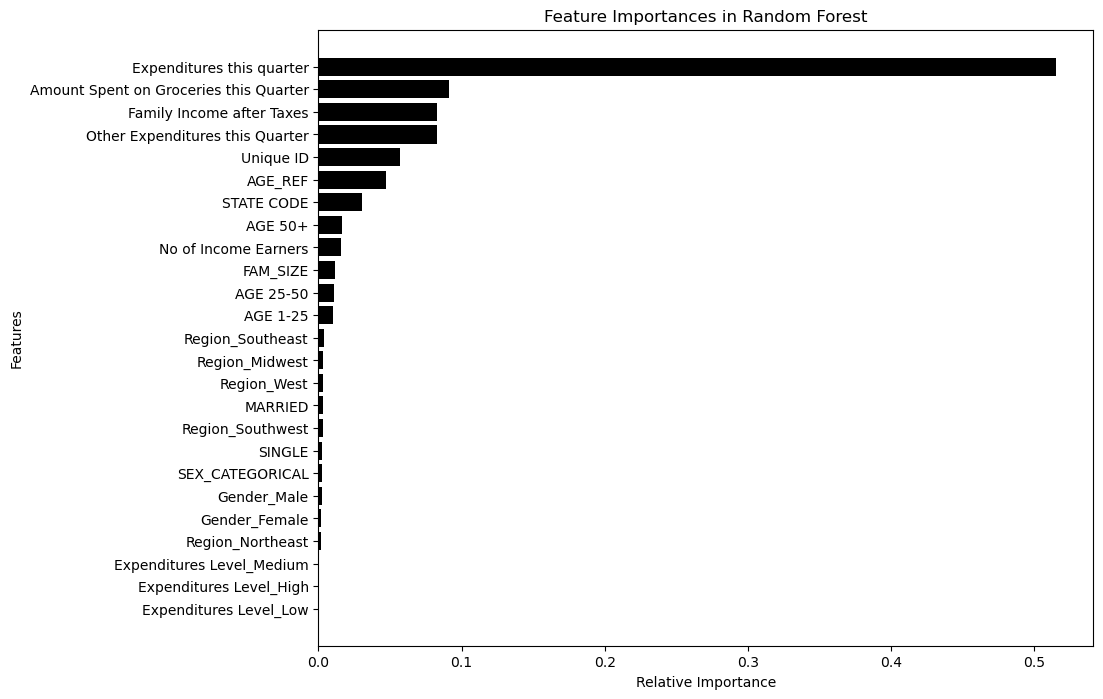

In [11]:
feature_importances = random_forest_model.feature_importances_
features = X_train.columns

# Sorting the feature importances
sorted_indices = feature_importances.argsort()
plt.figure(figsize=(10, 8))
plt.title("Feature Importances in Random Forest")
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices], align='center', color ='black')
plt.yticks(range(len(sorted_indices)), [features[i] for i in sorted_indices])
plt.xlabel("Relative Importance")
plt.ylabel("Features")
plt.show()


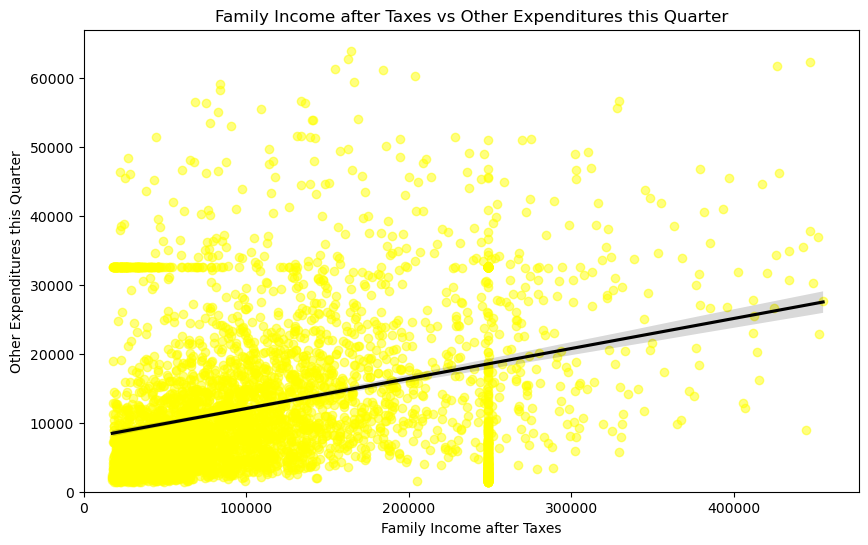

In [70]:

# Family Income after Taxes vs Other Expenditures this Quarter'


plt.figure(figsize=(10, 6))
sns.regplot(x='Family Income after Taxes', 
            y='Other Expenditures this Quarter', 
            data=df, 
            line_kws={"color":"black"},  # Setting the regression line color to black
            scatter_kws={"color":"yellow", "alpha":0.5})  # Setting the scatter plot points to yelow
plt.title('Family Income after Taxes vs Other Expenditures this Quarter')
plt.xlabel('Family Income after Taxes')
plt.ylabel('Other Expenditures this Quarter')
plt.xlim(left=0)  
plt.ylim(bottom=0)  
plt.show()


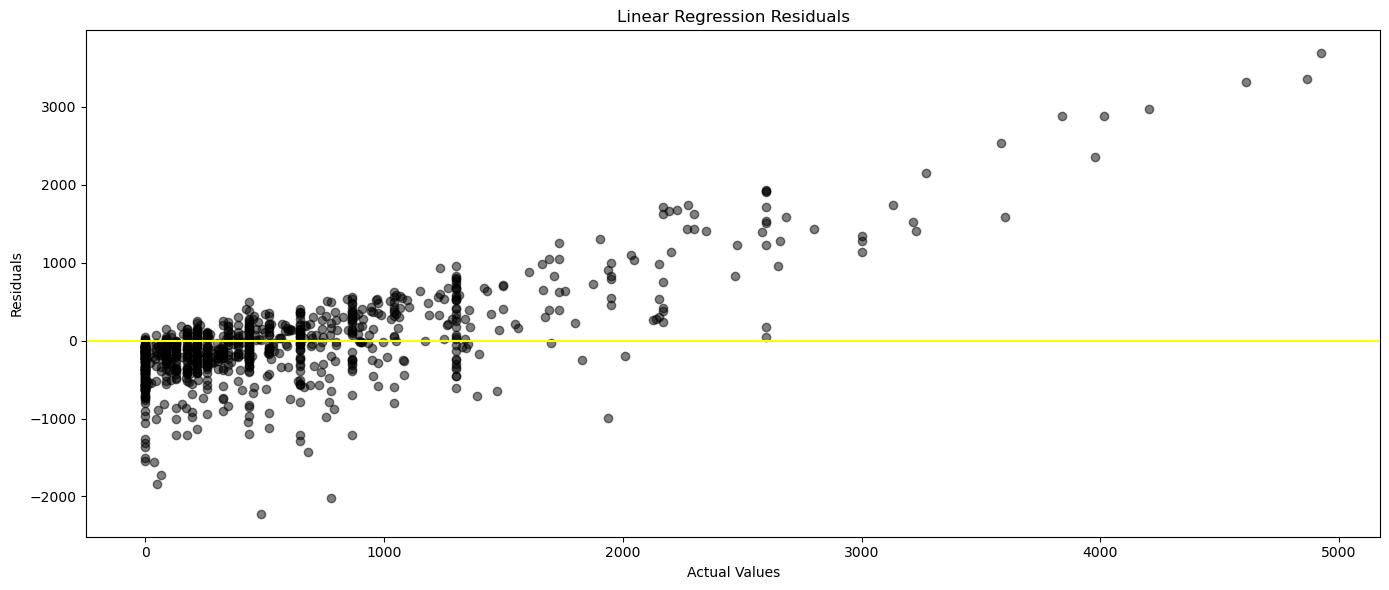

In [17]:
# Residual Plots
# plotting with 'y_test' as actual values and 'y_pred_linear', as predictions
# Linear Regression Residuals



# Calculating the residuals from the Linear Regression model
residuals_linear = y_test - y_pred_linear

# Set up the matplotlib figure for plotting
plt.figure(figsize=(14, 6))

# the residuals plot for the Linear Regression model
plt.scatter(y_test, residuals_linear, color='black', alpha=0.5)  
plt.title('Linear Regression Residuals')  # Title
plt.xlabel('Actual Values')  # Label for the x-axis
plt.ylabel('Residuals')  # Label for the y-axis
plt.axhline(y=0, color='yellow', linestyle='-')  # Horizontal line at residuals = 0

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()  # Display the plot



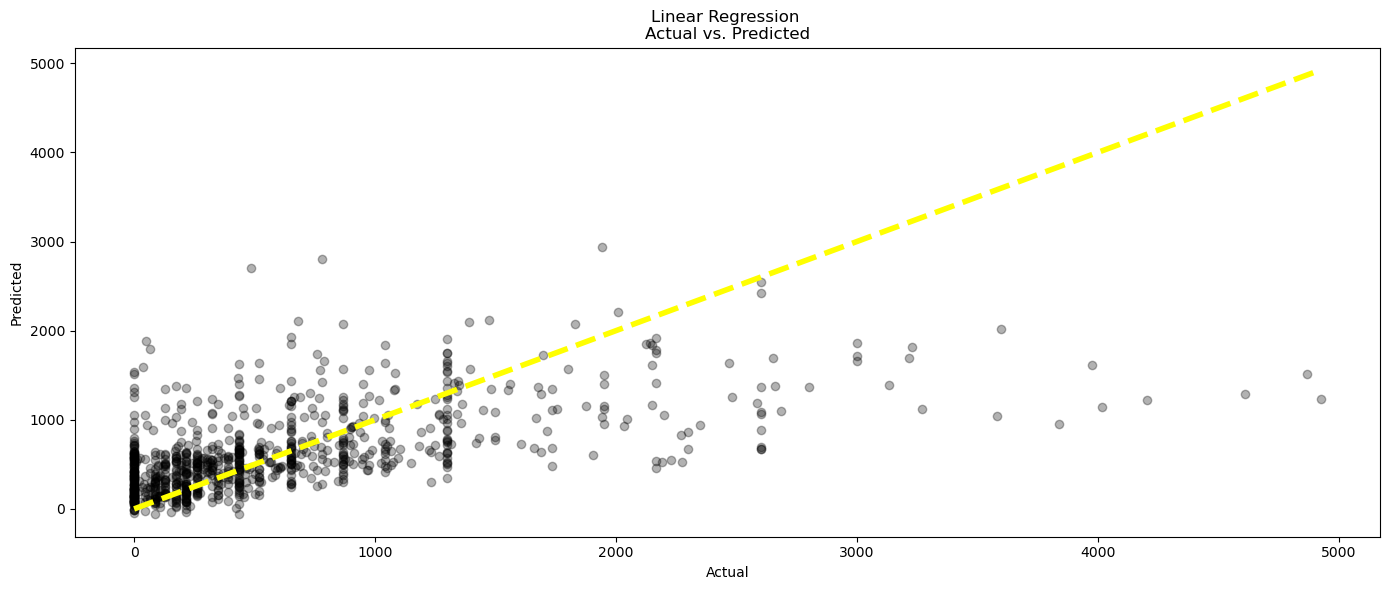

In [25]:
# Prediction Error Plots

plt.figure(figsize=(14, 6))

# Linear Regression
plt.scatter(y_test, y_pred_linear, alpha=0.3, color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--',color='yellow', lw=4)
plt.title('Linear Regression \nActual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')


plt.tight_layout()
plt.show()


## Correlation with Finance Related Variables

In [46]:

finance_vars = ['Family Income after Taxes', 'Expenditures this quarter', 'Amount Spent on Groceries this Quarter', 'Other Expenditures this Quarter', 'restaurant_spending_prev_quarter']
correlation_matrix = df[finance_vars].corr()
correlation_matrix



#Display the correlation with restaurant spending
correlation_matrix['restaurant_spending_prev_quarter']


Family Income after Taxes                 0.260663
Expenditures this quarter                 0.550620
Amount Spent on Groceries this Quarter    0.311304
Other Expenditures this Quarter           0.408022
restaurant_spending_prev_quarter          1.000000
Name: restaurant_spending_prev_quarter, dtype: float64

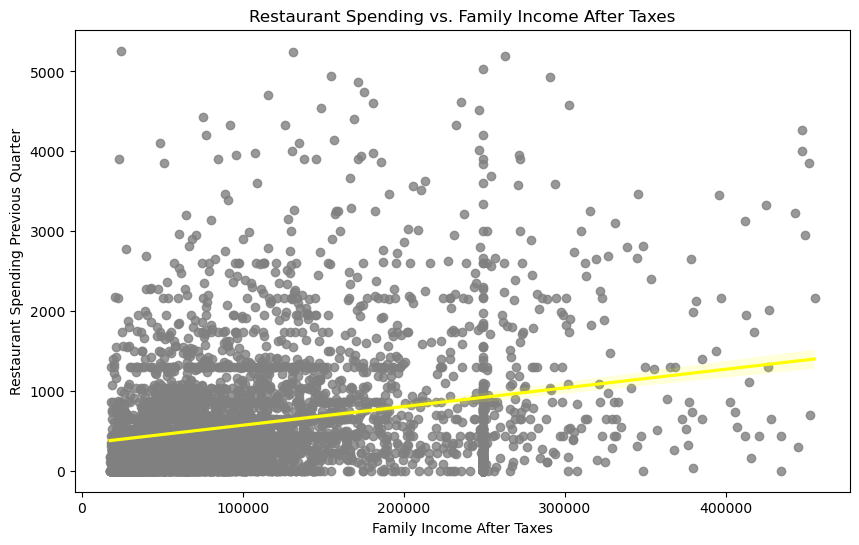

In [49]:

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Family Income after Taxes', y='restaurant_spending_prev_quarter', color='grey', line_kws={"color": "yellow"})
plt.title('Restaurant Spending vs. Family Income After Taxes')
plt.xlabel('Family Income After Taxes')
plt.ylabel('Restaurant Spending Previous Quarter')
plt.show()


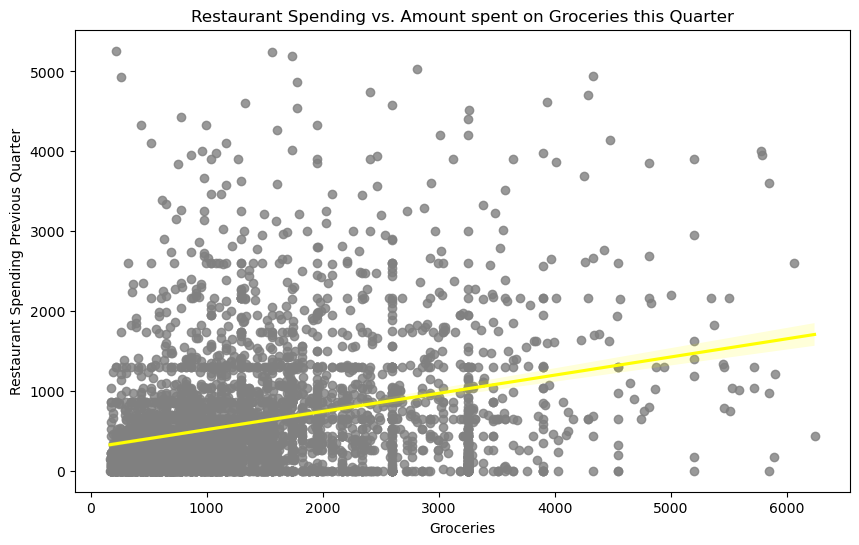

In [51]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Amount Spent on Groceries this Quarter', y='restaurant_spending_prev_quarter', color='grey', line_kws={"color": "yellow"})
plt.title('Restaurant Spending vs. Amount spent on Groceries this Quarter')
plt.xlabel('Groceries')
plt.ylabel('Restaurant Spending Previous Quarter')
plt.show()


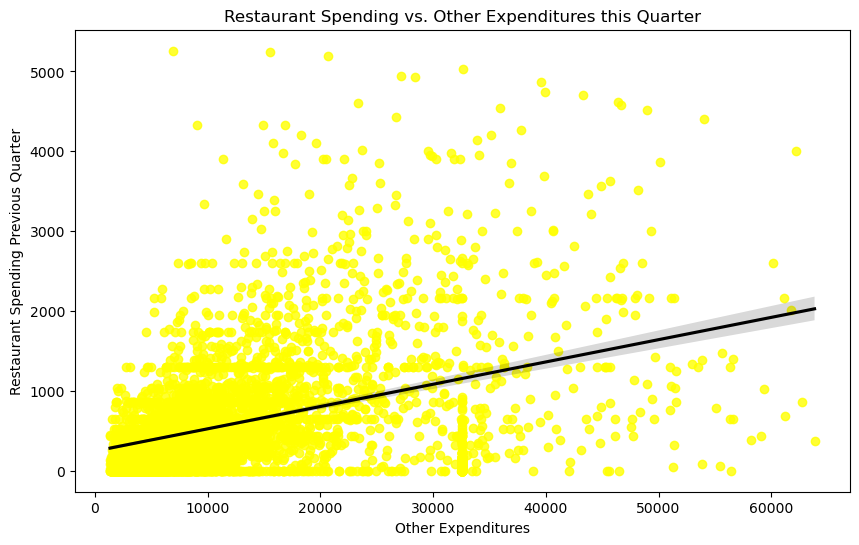

In [54]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Other Expenditures this Quarter', y='restaurant_spending_prev_quarter', color='yellow', line_kws={"color": "black"})
plt.title('Restaurant Spending vs. Other Expenditures this Quarter')
plt.xlabel('Other Expenditures')
plt.ylabel('Restaurant Spending Previous Quarter')
plt.show()



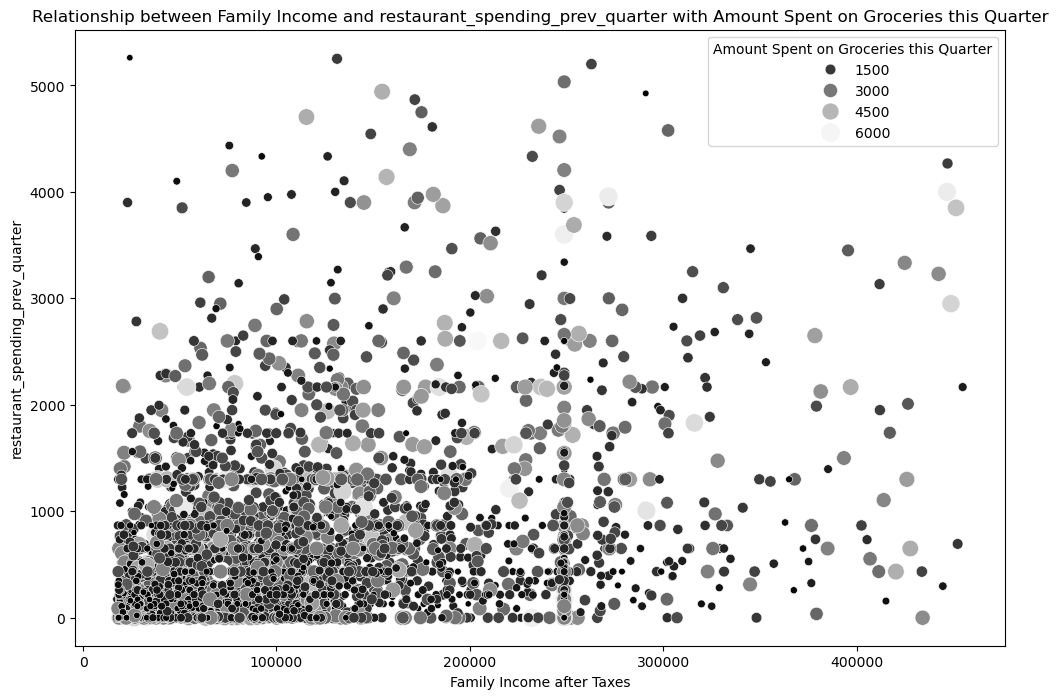

In [88]:
# Creating a scatter plot to show the relationship between family income and restaurant_spending_prev_quarter
# with the hue indicating Amount Spent on Groceries this Quarter

plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(data=df, x='Family Income after Taxes', y='restaurant_spending_prev_quarter',
                               size='Amount Spent on Groceries this Quarter', hue='Amount Spent on Groceries this Quarter', palette="grey", sizes=(20, 200))
plt.title('Relationship between Family Income and restaurant_spending_prev_quarter with Amount Spent on Groceries this Quarter')
plt.xlabel('Family Income after Taxes')
plt.ylabel('restaurant_spending_prev_quarter')
plt.legend(title='Amount Spent on Groceries this Quarter', loc='upper right')
plt.show()


## Average Restaurant Spending by Income Level


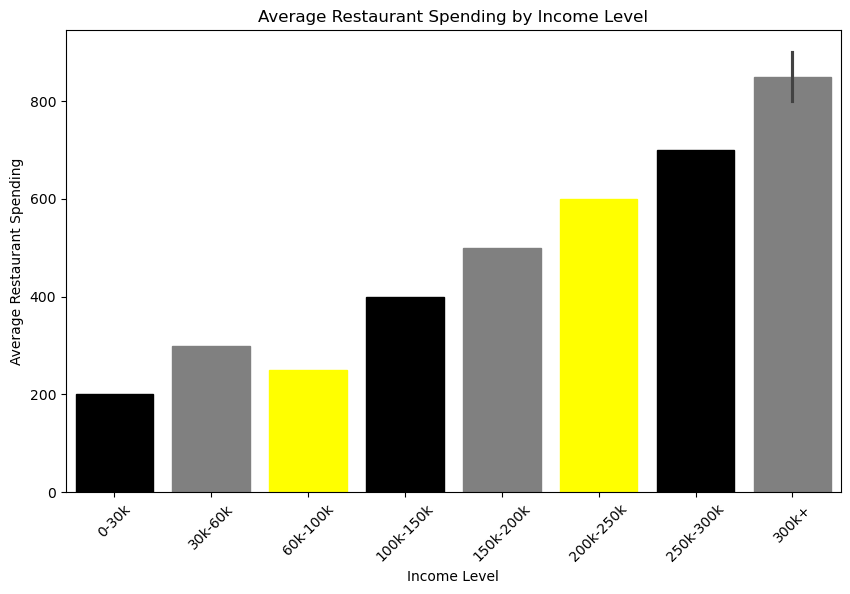

In [60]:
plt.figure(figsize=(10, 6))


barplot = sns.barplot(x='Income Level', y='restaurant_spending_prev_quarter', data=df, color='lightgrey')  # Default color


color_cycle = ['black', 'grey', 'yellow']  # Defining color cycle
for i, bar in enumerate(barplot.patches):  # Iterate over bars and set colors
    bar.set_color(color_cycle[i % len(color_cycle)])

plt.title('Average Restaurant Spending by Income Level')
plt.xticks(rotation=45)
plt.ylabel('Average Restaurant Spending')
plt.xlabel('Income Level')
plt.show()


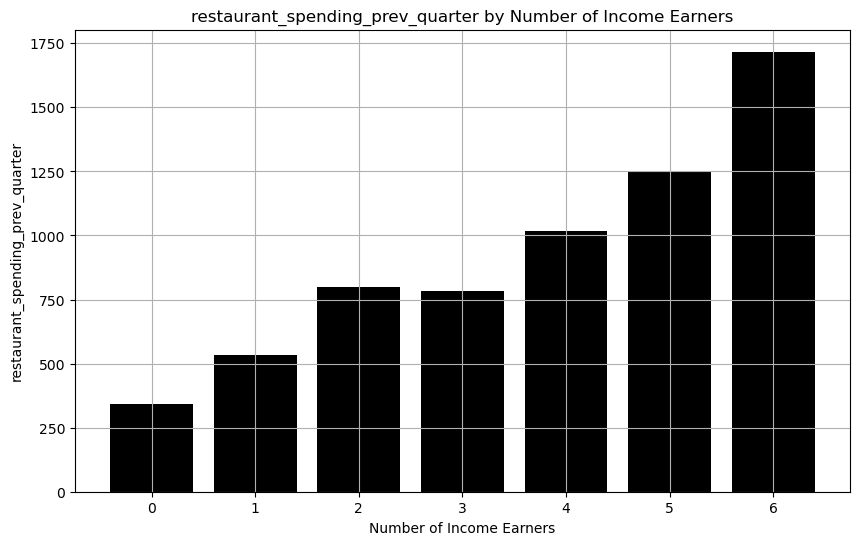

In [86]:
# Calculate average restaurant_spending_prev_quarter for each number of income earners with bar chart

income_earners_categories = df['No of Income Earners'].unique()
income_earners_categories.sort()  # Sort the categories 

avg_fdaway_per_income_earners = []
for earners in income_earners_categories:
    avg_fdaway = df[df['No of Income Earners'] == earners]['restaurant_spending_prev_quarter'].mean()
    avg_fdaway_per_income_earners.append(avg_fdaway)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(income_earners_categories.astype(str), avg_fdaway_per_income_earners, color='black')
plt.title('restaurant_spending_prev_quarter by Number of Income Earners')
plt.xlabel('Number of Income Earners')
plt.ylabel('restaurant_spending_prev_quarter')
plt.grid(True)
plt.show()
